### Import de librairies importantes

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('./output'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./output/queries_df.csv
./output/metric.pkl
./output/model_pretrained.pkl
./output/model.pkl
./output/.ipynb_checkpoints/queries_df-checkpoint.csv
./output/verbs/APPLYING.csv
./output/verbs/REMEMBERING.csv
./output/verbs/EVALUATING.csv
./output/verbs/CREATING.csv
./output/verbs/ANALYZING.csv
./output/verbs/UNDERSTANDING.csv
./output/verbs/.ipynb_checkpoints/REMEMBERING-checkpoint.csv


!pip install wordcloud

In [2]:
import pandas as pd #Pandas is easy-to-use data structures and data analysis tools for the Python programming language.
import numpy as np #Linear algebra 
import re #regex applies a regular expression to a string and returns the matching substrings. 
import matplotlib.pyplot as plt
import nltk 
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import BlanklineTokenizer
from nltk.tokenize import TweetTokenizer
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import string
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from multiprocessing import Pool

### Load dataset

In [3]:
df = pd.read_csv("./output/queries_df.csv")
df.head()

,QUERY,REMEMBERING,UNDERSTANDING,APPLYING,ANALYZING,EVALUATING,CREATING
0,"""their own language"" means _ .",1.0,0.0,0.0,0.0,0.0,0.0
1,"""you may think the popular singer jay chow is ...",0.0,1.0,0.0,0.0,0.0,0.0
2,". at midnight, nasreddin saw _ in his garden.",1.0,0.0,0.0,0.0,0.0,0.0
3,. david beckham is _ years old.,1.0,0.0,0.0,0.0,0.0,0.0
4,. david beckham's family name is _ and zhou...,1.0,0.0,0.0,0.0,0.0,0.0


### Preprocessing texts

In [4]:
categories = ["REMEMBERING", "UNDERSTANDING", "APPLYING", "ANALYZING", "EVALUATING", "CREATING"]

In [5]:
def unidecode_text(text):
    try:
        text = unidecode.unidecode(text)
    except:
        pass
    return text

df["text"] = df.QUERY.apply(unidecode_text)

In [6]:
from sklearn.model_selection import train_test_split
y = pd.Series(np.dot(df[categories], range(6)))

In [7]:
def clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower() #Convert strings in the Series/Index to lowercase.
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df

data_clean = clean_text(df, 'text', 'text_clean')
data_clean.head()

,QUERY,REMEMBERING,UNDERSTANDING,APPLYING,ANALYZING,EVALUATING,CREATING,text,text_clean
0,"""their own language"" means _ .",1.0,0.0,0.0,0.0,0.0,0.0,"""their own language"" means _ .",their own language means
1,"""you may think the popular singer jay chow is ...",0.0,1.0,0.0,0.0,0.0,0.0,"""you may think the popular singer jay chow is ...",you may think the popular singer jay chow is c...
2,". at midnight, nasreddin saw _ in his garden.",1.0,0.0,0.0,0.0,0.0,0.0,". at midnight, nasreddin saw _ in his garden.",at midnight nasreddin saw in his garden
3,. david beckham is _ years old.,1.0,0.0,0.0,0.0,0.0,0.0,. david beckham is _ years old.,david beckham is years old
4,. david beckham's family name is _ and zhou...,1.0,0.0,0.0,0.0,0.0,0.0,. david beckham's family name is _ and zhou...,david beckhams family name is and zhou ji...


In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_clean'].apply(lambda x: word_tokenize(x))
data_clean.head()

,QUERY,REMEMBERING,UNDERSTANDING,APPLYING,ANALYZING,EVALUATING,CREATING,text,text_clean,text_tokens
0,"""their own language"" means _ .",1.0,0.0,0.0,0.0,0.0,0.0,"""their own language"" means _ .",their own language means,"[their, own, language, means]"
1,"""you may think the popular singer jay chow is ...",0.0,1.0,0.0,0.0,0.0,0.0,"""you may think the popular singer jay chow is ...",you may think the popular singer jay chow is c...,"[you, may, think, the, popular, singer, jay, c..."
2,". at midnight, nasreddin saw _ in his garden.",1.0,0.0,0.0,0.0,0.0,0.0,". at midnight, nasreddin saw _ in his garden.",at midnight nasreddin saw in his garden,"[at, midnight, nasreddin, saw, in, his, garden]"
3,. david beckham is _ years old.,1.0,0.0,0.0,0.0,0.0,0.0,. david beckham is _ years old.,david beckham is years old,"[david, beckham, is, years, old]"
4,. david beckham's family name is _ and zhou...,1.0,0.0,0.0,0.0,0.0,0.0,. david beckham's family name is _ and zhou...,david beckhams family name is and zhou ji...,"[david, beckhams, family, name, is, and, zhou,..."


In [9]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text
data_clean['text_clean_tokens'] = data_clean['text_tokens'].apply(lambda x: word_stemmer(x))
data_clean.head()

,QUERY,REMEMBERING,UNDERSTANDING,APPLYING,ANALYZING,EVALUATING,CREATING,text,text_clean,text_tokens,text_clean_tokens
0,"""their own language"" means _ .",1.0,0.0,0.0,0.0,0.0,0.0,"""their own language"" means _ .",their own language means,"[their, own, language, means]","[their, own, languag, mean]"
1,"""you may think the popular singer jay chow is ...",0.0,1.0,0.0,0.0,0.0,0.0,"""you may think the popular singer jay chow is ...",you may think the popular singer jay chow is c...,"[you, may, think, the, popular, singer, jay, c...","[you, may, think, the, popular, singer, jay, c..."
2,". at midnight, nasreddin saw _ in his garden.",1.0,0.0,0.0,0.0,0.0,0.0,". at midnight, nasreddin saw _ in his garden.",at midnight nasreddin saw in his garden,"[at, midnight, nasreddin, saw, in, his, garden]","[at, midnight, nasreddin, saw, in, hi, garden]"
3,. david beckham is _ years old.,1.0,0.0,0.0,0.0,0.0,0.0,. david beckham is _ years old.,david beckham is years old,"[david, beckham, is, years, old]","[david, beckham, is, year, old]"
4,. david beckham's family name is _ and zhou...,1.0,0.0,0.0,0.0,0.0,0.0,. david beckham's family name is _ and zhou...,david beckhams family name is and zhou ji...,"[david, beckhams, family, name, is, and, zhou,...","[david, beckham, famili, name, is, and, zhou, ..."


In [10]:
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
data_clean['text_clean_tokens'] = data_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
data_clean.head()

,QUERY,REMEMBERING,UNDERSTANDING,APPLYING,ANALYZING,EVALUATING,CREATING,text,text_clean,text_tokens,text_clean_tokens
0,"""their own language"" means _ .",1.0,0.0,0.0,0.0,0.0,0.0,"""their own language"" means _ .",their own language means,"[their, own, language, means]","[their, own, language, mean]"
1,"""you may think the popular singer jay chow is ...",0.0,1.0,0.0,0.0,0.0,0.0,"""you may think the popular singer jay chow is ...",you may think the popular singer jay chow is c...,"[you, may, think, the, popular, singer, jay, c...","[you, may, think, the, popular, singer, jay, c..."
2,". at midnight, nasreddin saw _ in his garden.",1.0,0.0,0.0,0.0,0.0,0.0,". at midnight, nasreddin saw _ in his garden.",at midnight nasreddin saw in his garden,"[at, midnight, nasreddin, saw, in, his, garden]","[at, midnight, nasreddin, saw, in, his, garden]"
3,. david beckham is _ years old.,1.0,0.0,0.0,0.0,0.0,0.0,. david beckham is _ years old.,david beckham is years old,"[david, beckham, is, years, old]","[david, beckham, is, year, old]"
4,. david beckham's family name is _ and zhou...,1.0,0.0,0.0,0.0,0.0,0.0,. david beckham's family name is _ and zhou...,david beckhams family name is and zhou ji...,"[david, beckhams, family, name, is, and, zhou,...","[david, beckhams, family, name, is, and, zhou,..."


In [11]:
data_clean["text_clean"] = data_clean["text_clean_tokens"].apply(lambda x: " ".join(x))

In [12]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: remove_URL(x))

In [13]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: remove_html(x))

In [14]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: remove_emoji(x))

In [15]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: remove_punct(x))

In [16]:
data_clean.head()

,QUERY,REMEMBERING,UNDERSTANDING,APPLYING,ANALYZING,EVALUATING,CREATING,text,text_clean,text_tokens,text_clean_tokens
0,"""their own language"" means _ .",1.0,0.0,0.0,0.0,0.0,0.0,"""their own language"" means _ .",their own language mean,"[their, own, language, means]","[their, own, language, mean]"
1,"""you may think the popular singer jay chow is ...",0.0,1.0,0.0,0.0,0.0,0.0,"""you may think the popular singer jay chow is ...",you may think the popular singer jay chow is c...,"[you, may, think, the, popular, singer, jay, c...","[you, may, think, the, popular, singer, jay, c..."
2,". at midnight, nasreddin saw _ in his garden.",1.0,0.0,0.0,0.0,0.0,0.0,". at midnight, nasreddin saw _ in his garden.",at midnight nasreddin saw in his garden,"[at, midnight, nasreddin, saw, in, his, garden]","[at, midnight, nasreddin, saw, in, his, garden]"
3,. david beckham is _ years old.,1.0,0.0,0.0,0.0,0.0,0.0,. david beckham is _ years old.,david beckham is year old,"[david, beckham, is, years, old]","[david, beckham, is, year, old]"
4,. david beckham's family name is _ and zhou...,1.0,0.0,0.0,0.0,0.0,0.0,. david beckham's family name is _ and zhou...,david beckhams family name is and zhou jieluns...,"[david, beckhams, family, name, is, and, zhou,...","[david, beckhams, family, name, is, and, zhou,..."


In [17]:
data_clean.shape

(189799, 11)

In [18]:
data_clean['target'] = np.dot(data_clean[categories], range(6))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data_clean['text_clean'],
                                                    data_clean['target'], 
                                                    test_size = 0.3,
                                                    random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train, 
                                                    test_size = 0.15,
                                                    random_state = 42)

In [20]:
tfidf = TfidfVectorizer(encoding='utf-8',
                       ngram_range=(1, 3),
                       max_df=1.0,
                       min_df=3,
                       max_features=750,
                       norm='l2',
                       sublinear_tf=True)

In [21]:
train_features = tfidf.fit_transform(X_train).toarray()
print(train_features.shape)

(112930, 750)


In [22]:
val_features = tfidf.transform(X_val).toarray()
print(val_features.shape)

(19929, 750)


In [23]:
train_labels = y_train
val_labels = y_val

In [24]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

In [25]:
import metrics as m

In [26]:
mnb_classifier = MultinomialNB()
mnb_classifier.fit(train_features, train_labels)

MultinomialNB()

In [27]:
mnb_prediction = mnb_classifier.predict(val_features)

Accuracy = 0.648
----------------------------------------
Classification report:
               precision    recall  f1-score   support

  REMEMBERING       0.69      0.75      0.72      4904
UNDERSTANDING       0.61      0.19      0.29       929
     APPLYING       0.68      0.43      0.53      2492
    ANALYZING       0.72      0.65      0.69      4101
   EVALUATING       0.69      0.31      0.42      1708
     CREATING       0.58      0.83      0.68      5795

     accuracy                           0.65     19929
    macro avg       0.66      0.53      0.55     19929
 weighted avg       0.66      0.65      0.63     19929

----------------------------------------
Confusion matrix


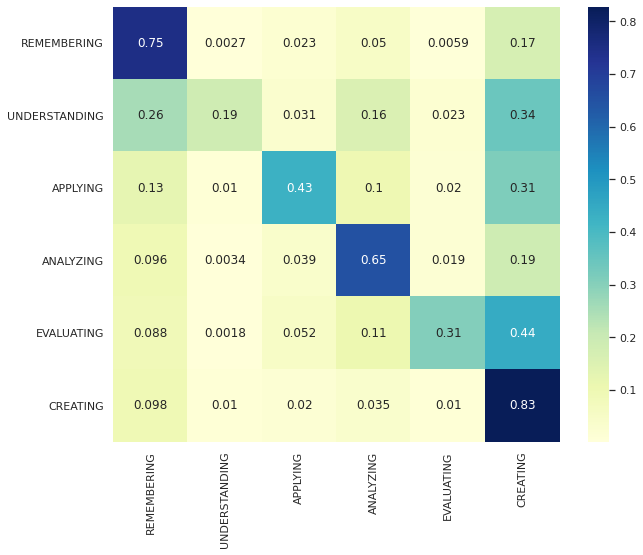

In [28]:
m.print_stats(mnb_prediction, val_labels, categories)

In [29]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [30]:
lr = LogisticRegression(random_state=42).fit(train_features, train_labels)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy = 0.865
----------------------------------------
Classification report:
               precision    recall  f1-score   support

  REMEMBERING       0.88      0.90      0.89      4904
UNDERSTANDING       0.77      0.63      0.69       929
     APPLYING       0.84      0.83      0.84      2492
    ANALYZING       0.87      0.88      0.88      4101
   EVALUATING       0.84      0.79      0.82      1708
     CREATING       0.87      0.90      0.89      5795

     accuracy                           0.86     19929
    macro avg       0.85      0.82      0.83     19929
 weighted avg       0.86      0.86      0.86     19929

----------------------------------------
Confusion matrix


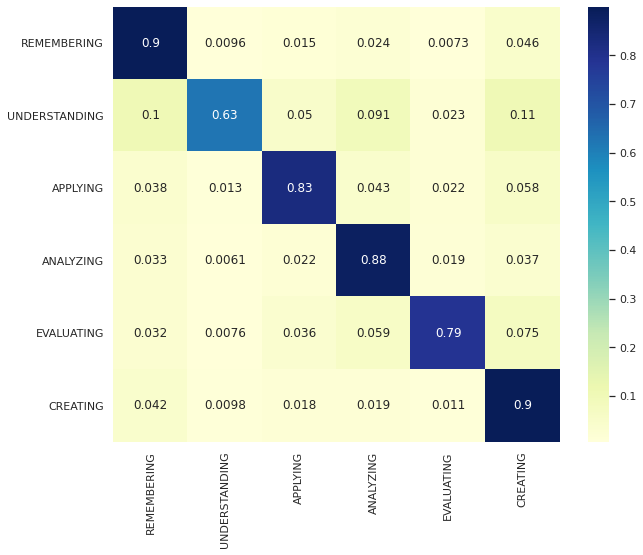

In [31]:
preds = lr.predict(val_features)
m.print_stats(preds, val_labels, categories)

In [32]:
lr = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42).fit(train_features, train_labels)

Accuracy = 0.840
----------------------------------------
Classification report:
               precision    recall  f1-score   support

  REMEMBERING       0.90      0.86      0.88      4904
UNDERSTANDING       0.50      0.84      0.62       929
     APPLYING       0.79      0.86      0.82      2492
    ANALYZING       0.90      0.83      0.86      4101
   EVALUATING       0.72      0.89      0.80      1708
     CREATING       0.92      0.81      0.86      5795

     accuracy                           0.84     19929
    macro avg       0.79      0.85      0.81     19929
 weighted avg       0.86      0.84      0.84     19929

----------------------------------------
Confusion matrix


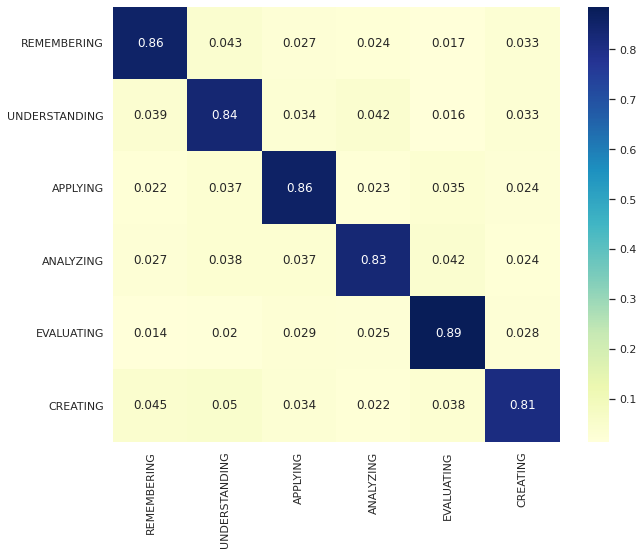

In [33]:
preds = lr.predict(val_features)
m.print_stats(preds, val_labels, categories)

In [34]:
sgdc = SGDClassifier(random_state=42).fit(train_features, train_labels)

Accuracy = 0.815
----------------------------------------
Classification report:
               precision    recall  f1-score   support

  REMEMBERING       0.80      0.90      0.85      4904
UNDERSTANDING       0.76      0.44      0.56       929
     APPLYING       0.82      0.75      0.78      2492
    ANALYZING       0.82      0.85      0.83      4101
   EVALUATING       0.86      0.60      0.71      1708
     CREATING       0.82      0.87      0.84      5795

     accuracy                           0.81     19929
    macro avg       0.81      0.73      0.76     19929
 weighted avg       0.82      0.81      0.81     19929

----------------------------------------
Confusion matrix


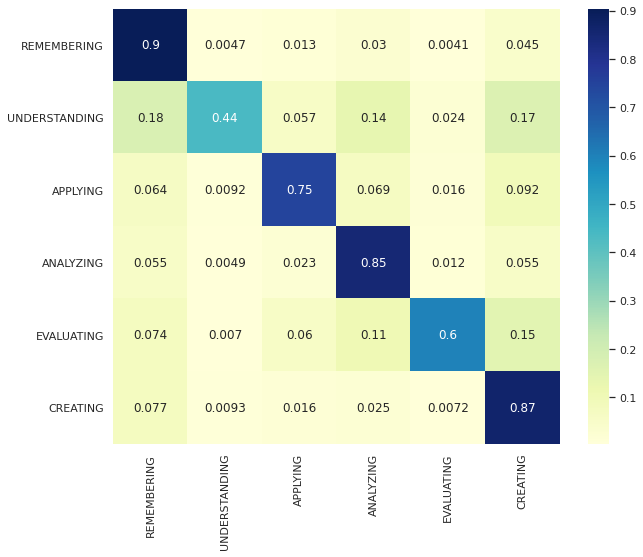

In [35]:
preds = sgdc.predict(val_features)
m.print_stats(preds, val_labels, categories)

In [38]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [39]:
rf = RandomForestClassifier(random_state=42).fit(train_features, train_labels)

Accuracy = 0.746
----------------------------------------
Classification report:
               precision    recall  f1-score   support

  REMEMBERING       0.80      0.78      0.79      4904
UNDERSTANDING       0.72      0.44      0.55       929
     APPLYING       0.71      0.66      0.68      2492
    ANALYZING       0.76      0.79      0.77      4101
   EVALUATING       0.76      0.49      0.59      1708
     CREATING       0.71      0.85      0.77      5795

     accuracy                           0.75     19929
    macro avg       0.74      0.67      0.69     19929
 weighted avg       0.75      0.75      0.74     19929

----------------------------------------
Confusion matrix


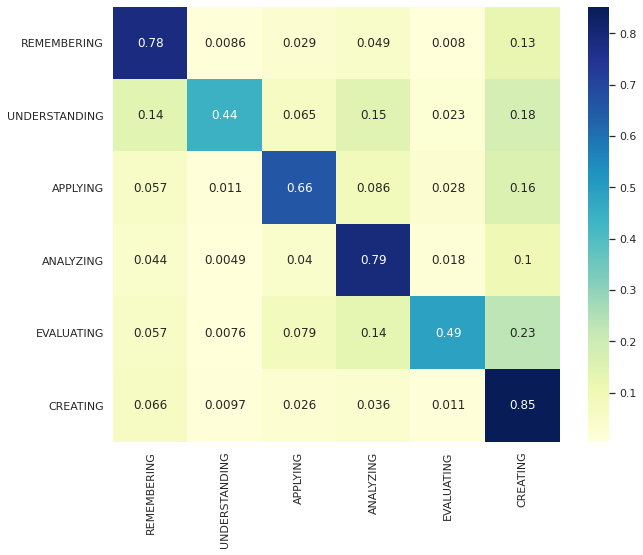

In [40]:
preds = rf.predict(val_features)
m.print_stats(preds, val_labels, categories)

In [41]:
from xgboost import XGBClassifier

In [44]:
clf = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.75, n_jobs=-1).fit(train_features, train_labels)

Accuracy = 0.820
----------------------------------------
Classification report:
               precision    recall  f1-score   support

  REMEMBERING       0.84      0.85      0.85      4904
UNDERSTANDING       0.75      0.57      0.65       929
     APPLYING       0.80      0.77      0.78      2492
    ANALYZING       0.83      0.85      0.84      4101
   EVALUATING       0.82      0.70      0.76      1708
     CREATING       0.82      0.87      0.84      5795

     accuracy                           0.82     19929
    macro avg       0.81      0.77      0.79     19929
 weighted avg       0.82      0.82      0.82     19929

----------------------------------------
Confusion matrix


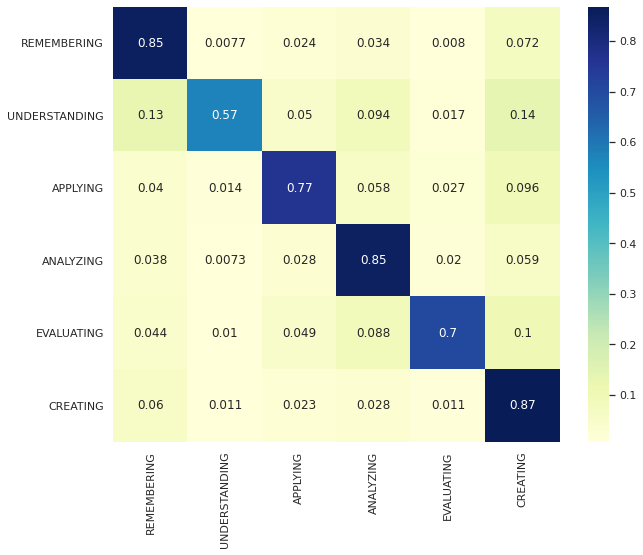

In [45]:
preds = clf.predict(val_features)
m.print_stats(preds, val_labels, categories)

In [47]:
probs = (lr.predict_proba(val_features)+clf.predict_proba(val_features))/2

Accuracy = 0.853
----------------------------------------
Classification report:
               precision    recall  f1-score   support

  REMEMBERING       0.88      0.87      0.88      4904
UNDERSTANDING       0.62      0.75      0.68       929
     APPLYING       0.81      0.85      0.83      2492
    ANALYZING       0.88      0.85      0.87      4101
   EVALUATING       0.80      0.84      0.82      1708
     CREATING       0.89      0.86      0.87      5795

     accuracy                           0.85     19929
    macro avg       0.81      0.84      0.82     19929
 weighted avg       0.86      0.85      0.85     19929

----------------------------------------
Confusion matrix


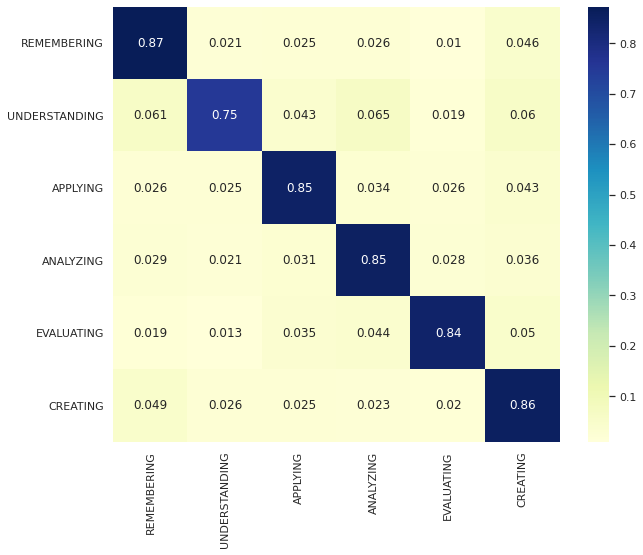

In [49]:
preds = np.argmax(probs, axis=1)
m.print_stats(preds, val_labels, categories)

In [53]:
perf = m.get_performance_metrics(np.array([val_labels==i for i in range(6)]).T, probs, list(categories))

In [54]:
perf

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
REMEMBERING,3962,14671,354,942,0.935,0.246,0.808,0.976,0.918,0.94,0.979,0.859,0.5
UNDERSTANDING,608,18799,201,321,0.974,0.047,0.654,0.989,0.752,0.983,0.962,0.7,0.5
APPLYING,1866,17181,256,626,0.956,0.125,0.749,0.985,0.879,0.965,0.981,0.809,0.5
ANALYZING,3156,15562,266,945,0.939,0.206,0.77,0.983,0.922,0.943,0.981,0.839,0.5
EVALUATING,1250,18036,185,458,0.968,0.086,0.732,0.99,0.871,0.975,0.983,0.795,0.5
CREATING,4536,13772,362,1259,0.919,0.291,0.783,0.974,0.926,0.916,0.975,0.848,0.5


In [56]:
def get_val_2d(values, n=6):
    return np.array([
        values==i for i in range(n)
    ]).T

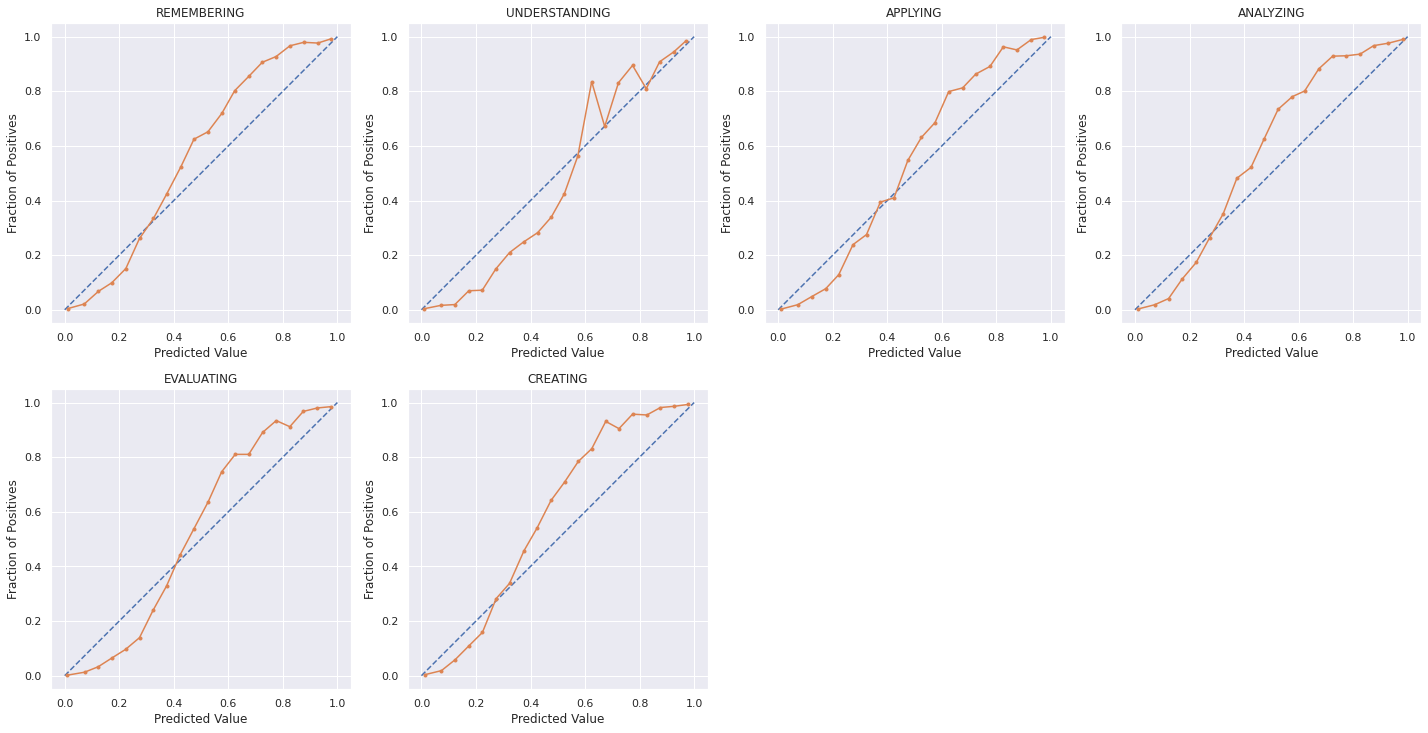

In [57]:
m.plot_calibration_curve(get_val_2d(val_labels), probs, categories)

In [58]:
statistiques = m.bootstrap_auc(get_val_2d(val_labels), probs, categories, fold_size=int(0.8*len(val_labels)))

In [59]:
m.print_confidence_intervals(categories, statistiques)

,Mean AUC (CI 5%-95%)
REMEMBERING,0.98 (0.98-0.98)
UNDERSTANDING,0.96 (0.96-0.97)
APPLYING,0.98 (0.98-0.98)
ANALYZING,0.98 (0.98-0.98)
EVALUATING,0.98 (0.98-0.99)
CREATING,0.97 (0.97-0.98)


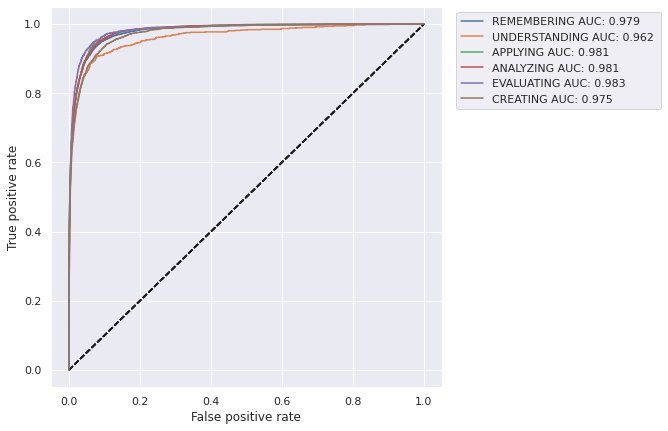

In [60]:
m.get_curve(get_val_2d(val_labels), probs, categories, curve='roc')

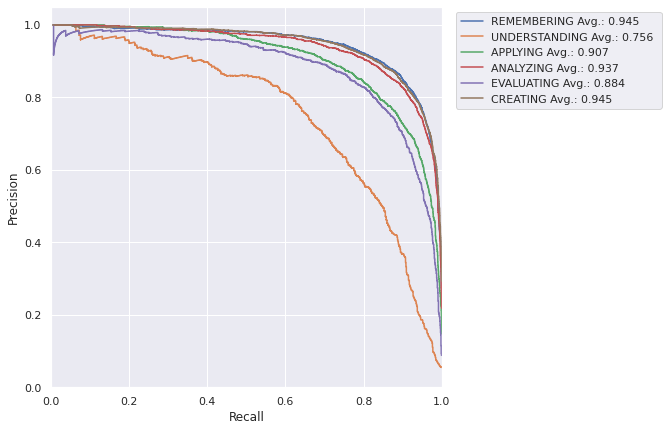

In [61]:
m.get_curve(get_val_2d(val_labels), probs, categories, curve='prc')

In [62]:
df.head()

,QUERY,REMEMBERING,UNDERSTANDING,APPLYING,ANALYZING,EVALUATING,CREATING,text,text_clean,text_tokens,text_clean_tokens,target
0,"""their own language"" means _ .",1.0,0.0,0.0,0.0,0.0,0.0,"""their own language"" means _ .",their own language mean,"[their, own, language, means]","[their, own, language, mean]",0.0
1,"""you may think the popular singer jay chow is ...",0.0,1.0,0.0,0.0,0.0,0.0,"""you may think the popular singer jay chow is ...",you may think the popular singer jay chow is c...,"[you, may, think, the, popular, singer, jay, c...","[you, may, think, the, popular, singer, jay, c...",1.0
2,". at midnight, nasreddin saw _ in his garden.",1.0,0.0,0.0,0.0,0.0,0.0,". at midnight, nasreddin saw _ in his garden.",at midnight nasreddin saw in his garden,"[at, midnight, nasreddin, saw, in, his, garden]","[at, midnight, nasreddin, saw, in, his, garden]",0.0
3,. david beckham is _ years old.,1.0,0.0,0.0,0.0,0.0,0.0,. david beckham is _ years old.,david beckham is year old,"[david, beckham, is, years, old]","[david, beckham, is, year, old]",0.0
4,. david beckham's family name is _ and zhou...,1.0,0.0,0.0,0.0,0.0,0.0,. david beckham's family name is _ and zhou...,david beckhams family name is and zhou jieluns...,"[david, beckhams, family, name, is, and, zhou,...","[david, beckhams, family, name, is, and, zhou,...",0.0


In [64]:
!pwd

/home/stokage2/kameni_a/dev/Stage 2020


In [65]:
with open("./sauvegarde/model_lr.pkl", "wb") as handle:
    pickle.dump(lr, handle)
with open("./sauvegarde/model_xgboost.pkl", "wb") as handle:
    pickle.dump(clf, handle)
with open("./sauvegarde/tfidf.pkl", "wb") as handle:
    pickle.dump(tfidf, handle)

In [67]:
["text_clean"] + categories

['text_clean',
 'REMEMBERING',
 'UNDERSTANDING',
 'APPLYING',
 'ANALYZING',
 'EVALUATING',
 'CREATING']

In [68]:
df.to_csv("./sauvegarde/data.csv", index=False, columns=["text_clean", "target"]+categories)

In [70]:
queries = df.sample(10)
queries

,QUERY,REMEMBERING,UNDERSTANDING,APPLYING,ANALYZING,EVALUATING,CREATING,text,text_clean,text_tokens,text_clean_tokens,target
171495,and how do you know which were the exact numbe...,0.0,0.0,0.0,0.0,0.0,1.0,and how do you know which were the exact numbe...,and how do you know which were the exact numbe...,"[and, how, do, you, know, which, were, the, ex...","[and, how, do, you, know, which, were, the, ex...",5.0
133383,and why do you have to take the ratios of the ...,0.0,0.0,0.0,0.0,0.0,1.0,and why do you have to take the ratios of the ...,and why do you have to take the ratio of the f...,"[and, why, do, you, have, to, take, the, ratio...","[and, why, do, you, have, to, take, the, ratio...",5.0
31973,is there a program i can use to slice these sh...,0.0,0.0,1.0,0.0,0.0,0.0,is there a program i can use to slice these sh...,is there a program i can use to slice these shape,"[is, there, a, program, i, can, use, to, slice...","[is, there, a, program, i, can, use, to, slice...",2.0
56934,how does the small area overlapping of electro...,0.0,0.0,0.0,1.0,0.0,0.0,how does the small area overlapping of electro...,how doe the small area overlapping of electron...,"[how, does, the, small, area, overlapping, of,...","[how, doe, the, small, area, overlapping, of, ...",3.0
144148,does having a the same amount of protons as ne...,0.0,1.0,0.0,0.0,0.0,0.0,does having a the same amount of protons as ne...,doe having a the same amount of proton a neutr...,"[does, having, a, the, same, amount, of, proto...","[doe, having, a, the, same, amount, of, proton...",1.0
138976,why is this painting ( at 0:28 ) labelled as `...,0.0,0.0,0.0,0.0,0.0,1.0,why is this painting ( at 0:28 ) labelled as `...,why is this painting at labelled a expressioni...,"[why, is, this, painting, at, labelled, as, ex...","[why, is, this, painting, at, labelled, a, exp...",5.0
69291,if thirty dash two people were hired and the p...,0.0,0.0,0.0,1.0,0.0,0.0,if thirty dash two people were hired and the p...,if thirty dash two people were hired and the p...,"[if, thirty, dash, two, people, were, hired, a...","[if, thirty, dash, two, people, were, hired, a...",3.0
143790,how do you figure out exactly how many protons...,0.0,0.0,0.0,1.0,0.0,0.0,how do you figure out exactly how many protons...,how do you figure out exactly how many proton ...,"[how, do, you, figure, out, exactly, how, many...","[how, do, you, figure, out, exactly, how, many...",3.0
167438,what if the equation ca n't make a perfect squ...,0.0,0.0,1.0,0.0,0.0,0.0,what if the equation ca n't make a perfect squ...,what if the equation ca nt make a perfect squa...,"[what, if, the, equation, ca, nt, make, a, per...","[what, if, the, equation, ca, nt, make, a, per...",2.0
131940,i 'm having trouble with this particular probl...,0.0,0.0,0.0,0.0,0.0,1.0,i 'm having trouble with this particular probl...,i m having trouble with this particular proble...,"[i, m, having, trouble, with, this, particular...","[i, m, having, trouble, with, this, particular...",5.0


In [71]:
queries = queries[queries.columns[:7]]
queries

,QUERY,REMEMBERING,UNDERSTANDING,APPLYING,ANALYZING,EVALUATING,CREATING
171495,and how do you know which were the exact numbe...,0.0,0.0,0.0,0.0,0.0,1.0
133383,and why do you have to take the ratios of the ...,0.0,0.0,0.0,0.0,0.0,1.0
31973,is there a program i can use to slice these sh...,0.0,0.0,1.0,0.0,0.0,0.0
56934,how does the small area overlapping of electro...,0.0,0.0,0.0,1.0,0.0,0.0
144148,does having a the same amount of protons as ne...,0.0,1.0,0.0,0.0,0.0,0.0
138976,why is this painting ( at 0:28 ) labelled as `...,0.0,0.0,0.0,0.0,0.0,1.0
69291,if thirty dash two people were hired and the p...,0.0,0.0,0.0,1.0,0.0,0.0
143790,how do you figure out exactly how many protons...,0.0,0.0,0.0,1.0,0.0,0.0
167438,what if the equation ca n't make a perfect squ...,0.0,0.0,1.0,0.0,0.0,0.0
131940,i 'm having trouble with this particular probl...,0.0,0.0,0.0,0.0,0.0,1.0


In [72]:
queries.QUERY.values

array(['and how do you know which were the exact numbers of the data set ?',
       'and why do you have to take the ratios of the friction and normal force and the ratios of the budging force and the normal force ?',
       'is there a program i can use to slice these shapes ?',
       'how does the small area overlapping of electron clouds interact in a way to produce a bond between atoms ?',
       'does having a the same amount of protons as neutrons mean the element has more potential ?',
       "why is this painting ( at 0:28 ) labelled as `` expressionism at it 's most extreme '' , influenced by matisse 's fauvism , but not as a fauvist painting itself ?",
       'if thirty dash two people were hired and the payroll was $ 3938 , how many heavy equipment operators were employed ?',
       'how do you figure out exactly how many protons , neutrons , and electrons total in a ( n ) atom ?',
       "what if the equation ca n't make a perfect square : y=3x^2-4x-2 y=3 ( x^2+ ( -4/3 ) +

In [87]:
type(queries["QUERY"]) == pd.core.series.Series

True

In [106]:
class CleanText():
    def __init__(self):
        self.text = None
    
    @staticmethod
    def clean(text: str):
        text = CleanText.unidecode_text(text)
        tokens = CleanText.text_tokenize(text)
        tokens = CleanText.text_stemmer(tokens)
        tokens = CleanText.text_lemmatizer(tokens)
        text = " ".join(tokens)
        text = CleanText.remove_URL(text)
        text = CleanText.remove_html(text)
        text = CleanText.remove_emoji(text)
        text = CleanText.remove_punct(text)
        return text
    
    @staticmethod
    def cleans(texts, column="text"):
        data = pd.DataFrame(texts.values, columns=[column])
        data["text_clean"] = data[column].apply(lambda x: CleanText.clean(x))
        return data
        
    @staticmethod
    def unidecode_text(text):
        try:
            text = unidecode.unidecode(text)
        except:
            pass
        return text

    @staticmethod
    def clean_text(text):
        import re
        text = text.lower() #Convert strings in the Series/Index to lowercase.
        text = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
        # remove numbers
        text = re.sub(r"\d+", "", text)
        return text

    @staticmethod
    def text_tokenize(text):
        from nltk.tokenize import word_tokenize
        return word_tokenize(text)

    @staticmethod
    def text_stemmer(text_tokens):
        from nltk.stem import PorterStemmer
        return [PorterStemmer().stem(i) for i in text_tokens]

    @staticmethod
    def text_lemmatizer(text_tokens):
        from nltk.stem import WordNetLemmatizer
        return [WordNetLemmatizer().lemmatize(i) for i in text_tokens]

    @staticmethod
    def remove_URL(text):
        import re
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', text)

    @staticmethod
    def remove_html(text):
        import re
        html = re.compile(r'<.*?>')
        return html.sub(r'',text)

    @staticmethod
    def remove_emoji(text):
        import re
        
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

    @staticmethod
    def remove_punct(text):
        import string
        table = str.maketrans('', '', string.punctuation)
        return text.translate(table)

In [108]:
queries_cleaned = CleanText.cleans(queries["QUERY"])

In [110]:
queries_cleaned.text_clean.values

array(['and how do you know which were the exact number of the data set ',
       'and whi do you have to take the ratio of the friction and normal forc and the ratio of the budg forc and the normal forc ',
       'is there a program i can use to slice these shape ',
       'how doe the small area overlap of electron cloud interact in a way to produc a bond between atom ',
       'doe have a the same amount of proton a neutron mean the element ha more potenti ',
       'whi is thi paint  at 028  label a  expression at it s most extrem   influenc by matiss s fauvism  but not a a fauvist paint itself ',
       'if thirti dash two peopl were hire and the payrol wa  3938  how mani heavi equip oper were employ ',
       'how do you figur out exactli how mani proton  neutron  and electron total in a  n  atom ',
       'what if the equat ca nt make a perfect squar  y3x24x2 y3  x2  43    23  next step  ',
       'i m have troubl with thi particular problem  in a hand of poker in which 5 card a

In [111]:
queries_cleaned_features = tfidf.transform(queries_cleaned.text_clean.values)

In [113]:
probs = (lr.predict_proba(queries_cleaned_features)+clf.predict_proba(queries_cleaned_features))/2

In [114]:
probs

array([[4.56262933e-02, 7.28844803e-03, 1.25875944e-02, 2.06837552e-01,
        1.49700669e-02, 7.12690024e-01],
       [8.61431911e-04, 3.36985147e-04, 2.24275227e-03, 1.03141196e-02,
        4.10696609e-04, 9.85833987e-01],
       [3.17236723e-03, 1.46510575e-02, 9.11563328e-01, 1.34703013e-02,
        5.88717323e-03, 5.12557641e-02],
       [1.93977139e-02, 2.23255867e-02, 6.93152129e-02, 8.83937444e-01,
        2.59874490e-03, 2.42529586e-03],
       [4.18438006e-02, 5.52640015e-02, 8.40194056e-02, 1.10425856e-02,
        3.52171878e-03, 8.04308476e-01],
       [5.05554070e-01, 3.29356831e-03, 9.51155924e-04, 1.01868531e-02,
        1.32229117e-02, 4.66791443e-01],
       [2.66812159e-03, 1.27383814e-03, 4.24657962e-02, 9.50001868e-01,
        2.50834690e-04, 3.33950160e-03],
       [3.65543131e-03, 6.96891010e-03, 4.93908148e-03, 8.95972688e-01,
        1.57902838e-02, 7.26736092e-02],
       [4.50134074e-03, 2.25718764e-02, 9.57636874e-01, 1.00511320e-02,
        1.57067875e-03, 

In [115]:
probs = pd.DataFrame(probs, columns=[category+"_pred" for category in categories])
probs

,REMEMBERING_pred,UNDERSTANDING_pred,APPLYING_pred,ANALYZING_pred,EVALUATING_pred,CREATING_pred
0,0.045626,0.007288,0.012588,0.206838,0.014970,0.712690
1,0.000861,0.000337,0.002243,0.010314,0.000411,0.985834
2,0.003172,0.014651,0.911563,0.013470,0.005887,0.051256
3,0.019398,0.022326,0.069315,0.883937,0.002599,0.002425
4,0.041844,0.055264,0.084019,0.011043,0.003522,0.804308
5,0.505554,0.003294,0.000951,0.010187,0.013223,0.466791
6,0.002668,0.001274,0.042466,0.950002,0.000251,0.003340
7,0.003655,0.006969,0.004939,0.895973,0.015790,0.072674
8,0.004501,0.022572,0.957637,0.010051,0.001571,0.003668
9,0.008954,0.013038,0.023965,0.009310,0.049360,0.895373


In [116]:
queries[categories]

,REMEMBERING,UNDERSTANDING,APPLYING,ANALYZING,EVALUATING,CREATING
171495,0.0,0.0,0.0,0.0,0.0,1.0
133383,0.0,0.0,0.0,0.0,0.0,1.0
31973,0.0,0.0,1.0,0.0,0.0,0.0
56934,0.0,0.0,0.0,1.0,0.0,0.0
144148,0.0,1.0,0.0,0.0,0.0,0.0
138976,0.0,0.0,0.0,0.0,0.0,1.0
69291,0.0,0.0,0.0,1.0,0.0,0.0
143790,0.0,0.0,0.0,1.0,0.0,0.0
167438,0.0,0.0,1.0,0.0,0.0,0.0
131940,0.0,0.0,0.0,0.0,0.0,1.0


In [118]:
preds = pd.DataFrame()
for x,y in zip(probs.columns, categories):
    preds[y] = queries[y].values
    preds[x] = probs[x].values
preds

,REMEMBERING,REMEMBERING_pred,UNDERSTANDING,UNDERSTANDING_pred,APPLYING,APPLYING_pred,ANALYZING,ANALYZING_pred,EVALUATING,EVALUATING_pred,CREATING,CREATING_pred
0,0.0,0.045626,0.0,0.007288,0.0,0.012588,0.0,0.206838,0.0,0.014970,1.0,0.712690
1,0.0,0.000861,0.0,0.000337,0.0,0.002243,0.0,0.010314,0.0,0.000411,1.0,0.985834
2,0.0,0.003172,0.0,0.014651,1.0,0.911563,0.0,0.013470,0.0,0.005887,0.0,0.051256
3,0.0,0.019398,0.0,0.022326,0.0,0.069315,1.0,0.883937,0.0,0.002599,0.0,0.002425
4,0.0,0.041844,1.0,0.055264,0.0,0.084019,0.0,0.011043,0.0,0.003522,0.0,0.804308
5,0.0,0.505554,0.0,0.003294,0.0,0.000951,0.0,0.010187,0.0,0.013223,1.0,0.466791
6,0.0,0.002668,0.0,0.001274,0.0,0.042466,1.0,0.950002,0.0,0.000251,0.0,0.003340
7,0.0,0.003655,0.0,0.006969,0.0,0.004939,1.0,0.895973,0.0,0.015790,0.0,0.072674
8,0.0,0.004501,0.0,0.022572,1.0,0.957637,0.0,0.010051,0.0,0.001571,0.0,0.003668
9,0.0,0.008954,0.0,0.013038,0.0,0.023965,0.0,0.009310,0.0,0.049360,1.0,0.895373
